## Read time series generated by Giovanni and plot time series
    
**Objectives**
- Plot the time series data which is generated by Giovanni in advance. 
    
**Data and data tools**
- Data: Monthly Extremes Detection Indices collection based on 1991-2020 version 2 [M2SMNXEDI.2](https://doi.org/10.5067/O8AX56DO60MI) 
- Subset: Use Giovanni to subset the time series of variable HWF in the collection M2SMNXEDI.2 [see Giovanni], (https://giovanni.gsfc.nasa.gov/giovanni/#service=TmAvMp&starttime=&endtime=&data=M2SMNXEDI_2_HWF&dataKeyword=%22M2SMNXEDI_2%22%2C%20HWF), saved as .csv format.
- Shapefile: Download the world country shapefile from [IPUMS International](https://international.ipums.org/international/resources/gis/IPUMSI_world_release2020.zip) to your local disk
- Visualize: Use this Python script 

**Author and Contact**
- Xiaohua Pan at NASA/GSFC/GES DISC (xiaohua.pan@nasa.gov)
- Last update: Feb. 27, 2024


    
**Disclaimer** 
- The code is for demonstration purposes only. Users are responsible to check for accuracy and revise to fit their objective.


### Download shapefile using curl:

In [2]:
! curl -O https://international.ipums.org/international/resources/gis/IPUMSI_world_release2020.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.8M  100 58.8M    0     0  5372k      0  0:00:10  0:00:09  0:00:01 4836k   0  5413k      0  0:00:11  0:00:10  0:00:01 4427k    0  0:00:11  0:00:11 --:--:-- 4258k


### Extract shapefile:

In [6]:
from zipfile import ZipFile

with ZipFile('IPUMSI_world_release2020.zip', 'r') as f:
    #extract in current directory
    f.extractall('IPUMSI_world_release2020')

### Import Other Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dttime
from datetime import date

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy
import cartopy.mpl.geoaxes
import cartopy.crs as ccrs
import geopandas
%matplotlib inline

In [2]:
# Read the time series generated by Giovanni
product='M2SMNXEDI_2'
sel_var_shortname = "HWF"  # Heat wave Frequency (Units: counts per month) 
sel_var_longname = "Heatwave Frequency (count of days satisfying the heatwave criteria of at least three consecutive days above the 90th percentile)"
sel_var_unit = 'Count'
sel_year_beg = '1980'
sel_year_end = '2023'
sel_season = 'JJA'

# This csv file was generated by Giovanni and saved as csv format to the local disk ./data
df = pd.read_csv('./data/g4.ints.M2SMNXEDI_2_HWF.19800101-20231231.JJA.csv',
        header=0,
        usecols=["Year", "United_States", "Canada"])
print(df.head())

   Year  Canada  United_States
0  1980       1              3
1  1981       2              1
2  1982       1              0
3  1983       2              1
4  1984       2              1


In [3]:
df = df.set_index('Year')
#df

In [4]:
# Plot the country maps inset in the line plot 
# read the shapefile from disk. Geopandas will return a GeoDataFrame object which is similar to a pandas DataFrame.
countries = geopandas.read_file('IPUMSI_world_release2020/world_countries_2020.shp')

Canada = countries[countries['CNTRY_NAME'].isin(['Canada'])]
United_States = countries[countries['CNTRY_NAME'].isin(['United States'])]
countries

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
0,1,Algeria,012,13010.0,"MULTIPOLYGON (((-2.05592 35.07370, -2.05675 35..."
1,2,Angola,024,12010.0,"MULTIPOLYGON (((12.79760 -4.41685, 12.79875 -4..."
2,3,In dispute South Sudan/Sudan,9999,99999.0,"POLYGON ((28.08408 9.34722, 28.03889 9.34722, ..."
3,4,Benin,204,15010.0,"MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299..."
4,5,Botswana,072,14010.0,"POLYGON ((25.16312 -17.77816, 25.16383 -17.778..."
...,...,...,...,...,...
279,280,Trinidad & Tobago,780,21220.0,"MULTIPOLYGON (((-61.60036 10.65408, -61.60078 ..."
280,281,Netherlands Antilles,531,21170.0,"MULTIPOLYGON (((-68.64378 11.98000, -68.64584 ..."
281,282,In dispute Brazil/Uruguay,9999,99999.0,"POLYGON ((-57.60586 -30.18462, -57.61300 -30.1..."
282,283,Uruguay,858,23130.0,"MULTIPOLYGON (((-54.97583 -34.95042, -54.97336..."


 Pick up your figure  Line_Giovanni_M2SMNXEDI_2_HWF_JJA_1980_2023.png


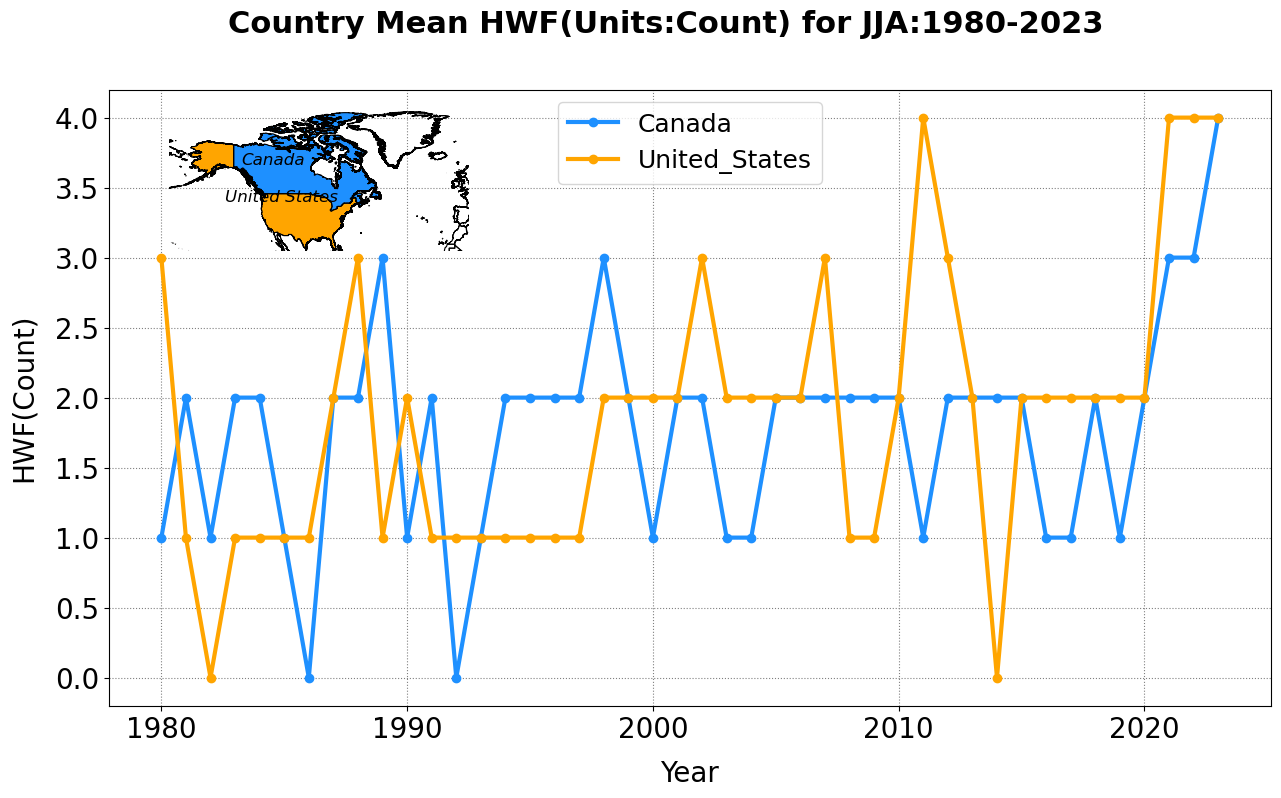

In [6]:
# Plot line
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid(color='gray', linestyle='dotted')
line_colors = ['dodgerblue', 'orange']
# line plot
df.plot(style='.-', marker='o', markersize=6,linewidth=3, ax=ax, color=line_colors)

# Bar plot
#df.plot.bar(ax=ax, color=line_colors)

plt.grid(color='gray', linestyle='dotted')
ax.tick_params(labelsize=20)
plt.legend(loc='upper center', fontsize=18)

# Plot main title and xy labels
main_title = "Country Mean {}(Units:{}) for {}:{}-{} ".format(sel_var_shortname,sel_var_unit, sel_season, sel_year_beg, sel_year_end)  
#ax.set_title('Monthly Air Temperature Anomalies over Texas in '+sel_date.strftime("%b")+' (reference period:1980-2009)', 
    #             fontweight='bold')
plt.suptitle(main_title, fontweight='bold', fontsize=22)
plt.xlabel("Year", labelpad=12, fontsize=20)
plt.ylabel('HWF(Count)'.format(sel_var_shortname,sel_var_unit), labelpad=12,  fontsize=20);

# Create map inset to highlight the area of interest (AOI)
#    Reference: https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.inset_axes.html
#       e.g., width 25% and height 25% of the parent axes' bounding box at the upper left corner (loc=2)   
axins = inset_axes(ax, width="35%", height="25%", loc=2,
                   axes_kwargs=dict(
                    facecolor="none"))

# set the lat and lon ranges 
#xlim = ([-180.0, -50.0])
#ylim = ([25.0, 80.0])

xlim = ([-180.0, 0.0])
ylim = ([25.0, 90.0])

axins.set_xlim(xlim)
axins.set_ylim(ylim)

# Plot the highlighted countries
countries_map = countries.boundary.plot(ax=axins, color="black", linewidth=.8)
Canada.plot(ax=countries_map,  color=line_colors[0])
Canada.apply(lambda x: countries_map.annotate(x.CNTRY_NAME, xy=x.geometry.centroid.coords[0], ha='right', color='black',
                                                      fontsize=12, fontstyle='italic'),axis=1);
United_States.plot(ax=countries_map,  color=line_colors[1])
United_States.apply(lambda x: countries_map.annotate(x.CNTRY_NAME, xy=x.geometry.centroid.coords[0], ha='center', color='black',
                                                      fontsize=12, fontstyle='italic'),axis=1);
countries_map.axis('off')

# Save the plot 
figFile_plot = "Line_Giovanni_{}_{}_{}_{}_{}.png".format(product,sel_var_shortname, sel_season, sel_year_beg, sel_year_end)
plt.savefig(figFile_plot, dpi=70)
print(" Pick up your figure ", figFile_plot) 